In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
reviews = pd.read_csv('amazon_cells_labelled.txt',delimiter= '\t', header=None)

In [16]:
reviews.columns = ['Review', 'Pos or Neg']

In [18]:
reviews.head()

,Review,Pos or Neg
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [47]:
keywords = ['good', 'excellent', 'awesome', 'great','fantastic']

for key in keywords:
    reviews[str(key)] = reviews.Review.str.contains(' ' + str(key) + ' ', case=False)

Chose good, excellent, awesome, great and fantastic as a starting point for positive reviews

In [49]:
reviews.head()

,Review,Pos or Neg,good,excellent,great,awesome,fantastic
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False
1,"Good case, Excellent value.",1,False,True,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False


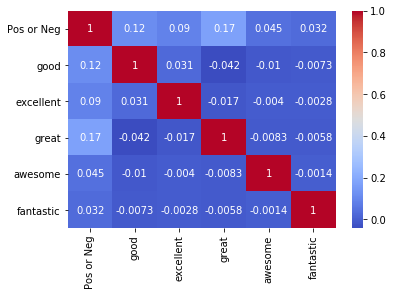

In [50]:
sns.heatmap(reviews.corr(), cmap='coolwarm', annot=True)

The features are pretty much uncorrelated, so the assumptions of the model are valid

In [54]:
data = reviews.drop(['Pos or Neg','Review'],axis=1)

In [53]:
target= reviews['Pos or Neg']

Creating a Naive Bayes model, importing the Bernoulli class since our target data is binary

In [55]:
from sklearn.naive_bayes import BernoulliNB

In [56]:
bnb = BernoulliNB()

In [57]:
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [58]:
y_pred = bnb.predict(data)

In [59]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 433
